In [84]:
import pandas as pd

df = pd.read_csv('C:\\Users\\13kum\\Downloads\\noshowappointments.csv')

print(df.head())

df['Appointment Day'] = pd.to_datetime(df['Appointment Day'])
df['Scheduled Day'] = pd.to_datetime(df['Scheduled Day'])

df['WaitingDays'] = (df['Appointment Day'] - df['Scheduled Day']).dt.days

df['Weekday'] = df['Appointment Day'].dt.day_name()

df['WeekdayCode'] = df['Weekday'].astype('category').cat.codes

print(df[['WaitingDays', 'Weekday', 'WeekdayCode']].head())

     Patient Id  Appointment ID Gender Scheduled Day      Time  \
0  2.987250e+13         5642903      F    29-04-2016  18:38:08   
1  5.589980e+14         5642503      M    29-04-2016  16:08:27   
2  4.262960e+12         5642549      F    29-04-2016  16:19:04   
3  8.679510e+11         5642828      F    29-04-2016  17:29:31   
4  8.841190e+12         5642494      F    29-04-2016  16:07:23   

  Appointment Day  Age      Neighbourhood  Scholarship  Hypertension  \
0      29-04-2016   62    JARDIM DA PENHA            0             1   
1      29-04-2016   56    JARDIM DA PENHA            0             0   
2      29-04-2016   62      MATA DA PRAIA            0             0   
3      29-04-2016    8  PONTAL DE CAMBURI            0             0   
4      29-04-2016   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handi cap  SMS received  0-show  
0         0           0          0             0       0  
1         0           0          0             0    

C:\Users\13kum\AppData\Local\Temp\ipykernel_20672\2441906059.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Appointment Day'] = pd.to_datetime(df['Appointment Day'])
C:\Users\13kum\AppData\Local\Temp\ipykernel_20672\2441906059.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Scheduled Day'] = pd.to_datetime(df['Scheduled Day'])


In [85]:
df['Appointment Day'] = pd.to_datetime(df['Appointment Day'], dayfirst=True)
df['Scheduled Day'] = pd.to_datetime(df['Scheduled Day'], dayfirst=True)


In [87]:
features = ['Age', 'SMS received', 'WaitingDays', 'WeekdayCode']
X = df[features]
y = df['0-show']  


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)   
y_true = y_test                  

print(classification_report(y_true, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17669
           1       0.31      0.02      0.03      4437

    accuracy                           0.80     22106
   macro avg       0.56      0.50      0.46     22106
weighted avg       0.70      0.80      0.71     22106



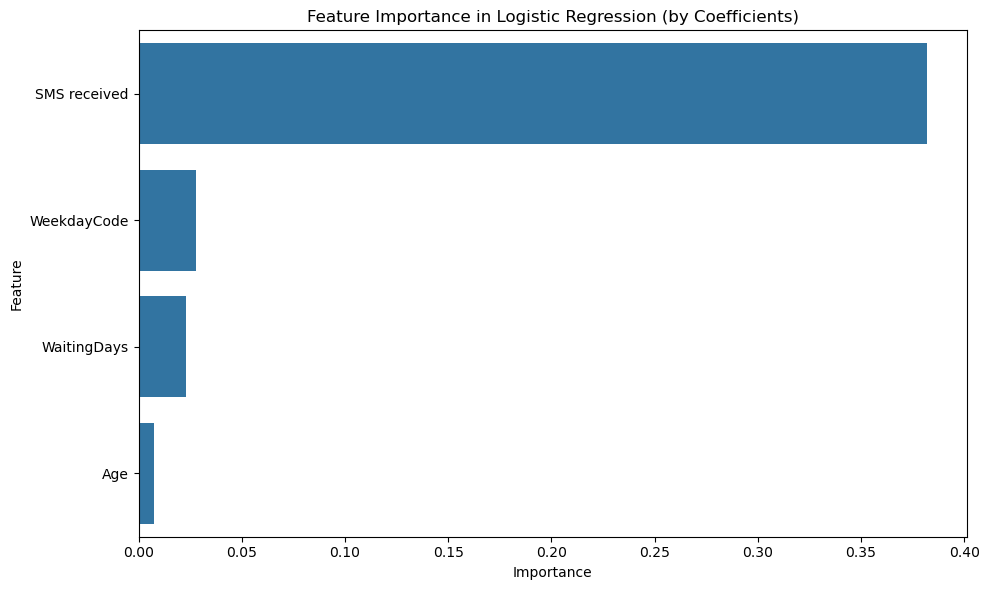

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


coefficients = model.coef_[0]  # shape: (1, n_features), so we take the first row


importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(coefficients)  
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Logistic Regression (by Coefficients)')
plt.tight_layout()
plt.show()


In [93]:
df.to_csv('noshow_cleaned_for_powerbi.csv', index=False)
